In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
import re

In [2]:
# Load the dataset

arg = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/ARG.csv")
aus = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/AUS.csv")
can = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/CAN.csv")
esp = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/ESP.csv")
fra = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/FRA.csv")
gbp = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/GBP.csv")
ger = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/GER.csv")
ita = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/ITA.csv")
jpn = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/JPN.csv")
kor = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/KOR.csv")
mex = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/MEX.csv")
sui = pd.read_csv("../input/1-billboard-music-chart-2019-till-aug-2020/SUI.csv")

In [3]:
# Assigning Continent Variable
arg['Cont'] = 'AME'
aus['Cont'] = "AUS"
can['Cont'] = "AME"
esp['Cont'] = "EUR"
fra['Cont'] = "EUR"
gbp['Cont'] = "EUR"
ger['Cont'] = "EUR"
ita['Cont'] = "EUR"
jpn['Cont'] = "ASI"
kor['Cont'] = "ASI"
mex['Cont'] = "AME"
sui['Cont'] = "EUR"

In [4]:
# Assigning Country Variable
arg['Country'] = 'ARG'
aus['Country'] = "AUS"
can['Country'] = "CAN"
esp['Country'] = "ESP"
fra['Country'] = "FRA"
gbp['Country'] = "GBP"
ger['Country'] = "GER"
ita['Country'] = "ITA"
jpn['Country'] = "JPN"
kor['Country'] = "KOR"
mex['Country'] = "MEX"
sui['Country'] = "SUI"

In [5]:
def get_season(month, year):
    # to return the season given month and year
    
    if month in [3, 4, 5]:
        if year == 2019:
            return 'Spring 19'
        else:
            return 'Spring 20'
    elif month in [6, 7, 8]:
        if year == 2019:
            return 'Summer 19'
        else:
            return 'Summer 20'
    elif month in [9, 10, 11]:
        if year == 2019:
            return 'Autumn 19'
        else:
            return 'Autumn 20'
    elif month in [1,2] :
        if year == 2019:
            return 'Winter 18-19'
        else:
            return 'Winter 19-20'
    else:
        return 'Winter 18-19'

In [6]:
# Combining all charts
all_chart = pd.concat([arg, aus, can, esp, fra, gbp, ger, ita, jpn, kor, mex, sui])

# Assign time-related variables for analysis
all_chart['Date'] = pd.DatetimeIndex(all_chart['Date'])
all_chart['year'] = pd.DatetimeIndex(all_chart['Date']).year
all_chart['month'] = pd.DatetimeIndex(all_chart['Date']).month
all_chart['season'] = all_chart.apply(lambda x: get_season(x.month, x.year), axis = 1)
all_chart.drop(['Unnamed: 0', 'Unnamed: 0.1', 'aSearch', 'searcher'], axis = 1, inplace= True)

In [7]:
# Necessary lists for later analysis

af_cols = ['danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']

idx = ['Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19', 'Jan 20', 'Feb 20', 'Mar 20', 'Apr 20', 
       'May 20', 'Jun 20', 'Jul 20', 'Aug 20']

season_idx = ['Winter 18-19', 'Spring 19', 'Summer 19', 'Autumn 19','Winter 19-20', 'Spring 20', 'Summer 20']
music_keys = { 0: "C", 1 : "C#/Db", 2 : "D", 3 : "D#/Eb", 4: "E", 5 : "F", 6 : "F#/Gb", 7 : "G",8: "G#/Ab", 9 : "A", 10 : "A#/Bb", 11 : "B"}

<h2> Who Frequented The #1 in Charts Every Week?

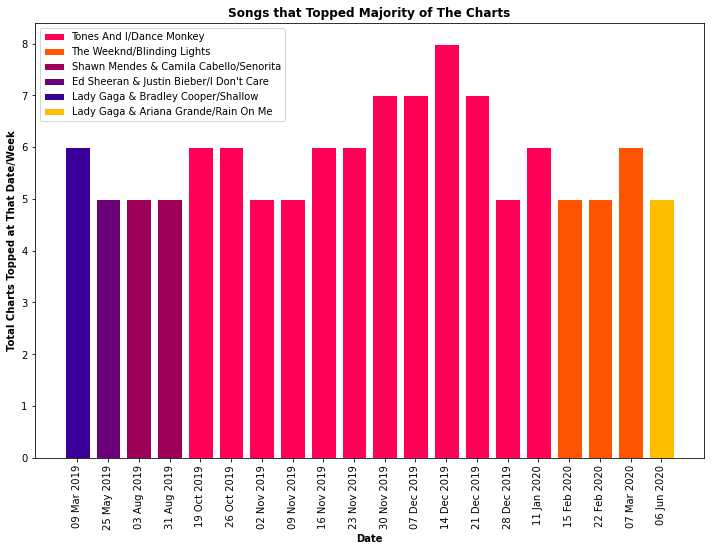

In [10]:
all_chart['Artist-Song'] = all_chart['Artist'] + "/" + all_chart['TrackName']

# Aggregating data by week, and count occurence of each Artist-Song combination
agg_week_mode = all_chart.groupby(['Date'])[['Artist-Song']].agg(lambda x:x.value_counts().index[0])
agg_week_mode['Counts'] = all_chart.groupby(['Date'])['Artist-Song'].agg(lambda x:x.value_counts()[0]).values

# Select weeks when a song topped at least 5 charts
week_top = agg_week_mode.query('Counts >= 5')

# Set width of bar
barWidth = 0

# Set position of bar on X axis
r1 = np.arange(len(week_top))

popularSongCounts = week_top['Counts'].values

# Create Masks for coloring the chart, returning indices when artist-song topped most charts
mask1 = week_top['Artist-Song'] == 'Tones And I/Dance Monkey'
mask2 = week_top['Artist-Song'] == 'The Weeknd/Blinding Lights'
mask3 = week_top['Artist-Song'] == 'Shawn Mendes & Camila Cabello/Senorita'
mask4 = week_top['Artist-Song'] == "Ed Sheeran & Justin Bieber/I Don't Care"
mask5 = week_top['Artist-Song'] == "Lady Gaga & Bradley Cooper/Shallow"
mask6 = week_top['Artist-Song'] == "Lady Gaga & Ariana Grande/Rain On Me"

# Make the plot
f, ax = plt.subplots(figsize=(12, 8))
plt.bar(r1[mask1.values], popularSongCounts[mask1.values], color ='#FF0054', edgecolor='white', label = 'Tones And I/Dance Monkey')
plt.bar(r1[mask2.values], popularSongCounts[mask2.values], color ='#FF5400', edgecolor='white', label = 'The Weeknd/Blinding Lights')
plt.bar(r1[mask3.values], popularSongCounts[mask3.values], color ='#9E0059', edgecolor='white', label = 'Shawn Mendes & Camila Cabello/Senorita')
plt.bar(r1[mask4.values], popularSongCounts[mask4.values], color ='#6C0079', edgecolor='white', label = "Ed Sheeran & Justin Bieber/I Don't Care")
plt.bar(r1[mask5.values], popularSongCounts[mask5.values], color ='#390099', edgecolor='white', label = 'Lady Gaga & Bradley Cooper/Shallow')
plt.bar(r1[mask6.values], popularSongCounts[mask6.values], color ='#FFBD00', edgecolor='white', label = 'Lady Gaga & Ariana Grande/Rain On Me')

# Add xticks on the middle of the group bars
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Total Charts Topped at That Date/Week', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(week_top))], week_top.index.strftime('%d %b %Y'), rotation = 90)
plt.title('Songs that Topped Majority of The Charts', fontweight='bold')

label_songArtist = ['Tones And I/Dance Monkey', 'The Weeknd/Blinding Lights', 'Shawn Mendes & Camila Cabello/Senorita',
          "Ed Sheeran & Justin Bieber/I Don't Care",'Lady Gaga & Bradley Cooper/Shallow','Lady Gaga & Ariana Grande/Rain On Me']
ax.legend(handles=ax.lines[::len(week_top)+1], labels=label_songArtist)
plt.show()


<h4> Apparently, Dance Monkey (by Tones and I) has topped multiple charts since October 2019 to January 2020. It has topped 8 charts in 14 December 2019 and 7 charts for 3 times/weeks. In 2020, Blinding Lights (by The Weeknd) has topped 7 charts in 7 March and 6 charts in 15 & 22 February.

<h2> Song Modality and Keys

In [11]:
# Get unique songs in all charts
agg_mode_key_unique = all_chart.drop_duplicates(subset = ["TrackName"])[['Artist', 'Country', 'year', 'TrackName', 'mode', 'key']]

# Get occurence of keys & modes
agg_key = agg_mode_key_unique['key'].value_counts()
agg_mode = agg_mode_key_unique['mode'].value_counts()

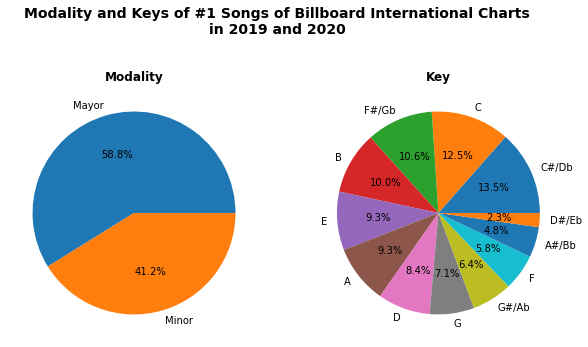

In [13]:
# Creating plot 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
ax1.pie(agg_mode, autopct='%1.1f%%',labels = ['Mayor', 'Minor']) 
ax1.set_title('Modality', fontweight='bold')
label_keys = agg_key.index.astype(int).map(lambda x: music_keys[x])
ax2.pie(agg_key, autopct='%1.1f%%',labels = label_keys) 
ax2.set_title('Key', fontweight='bold')
fig.suptitle('Modality and Keys of #1 Songs of Billboard International Charts\nin 2019 and 2020', fontweight='bold', fontsize = 14)

# show plot 
plt.show() 

<h2> Changes in Audio Features from 2019 to 2020

In [14]:
def createPlotAudioFeature(change, var_name, color):
    # Create a Plot about Feature Changes
    
    # set width of bar
    barWidth = 0

    # Set position of bar on X axis
    r1 = np.arange(len(change))

    # Make the plot
    plt.figure(figsize=(6,4))
    plt.bar(r1, change, color=color, edgecolor='white')
    # Add xticks on the middle of the group bars
    plt.xlabel('Country', fontweight='bold')
    plt.ylabel('Change', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(change))], countries)
    plt.title('Changes in ' + var_name + ' in Billboard International Charts', fontweight='bold')

    # Create legend & Show graphic
    plt.show()

In [15]:
# Group by Country and Year, and calculate the average of combination country and year
agg_country_year = all_chart.groupby(['Country', 'year'])[af_cols].agg('mean')
countries = agg_country_year.index.get_level_values('Country').unique()

<h3> Valence

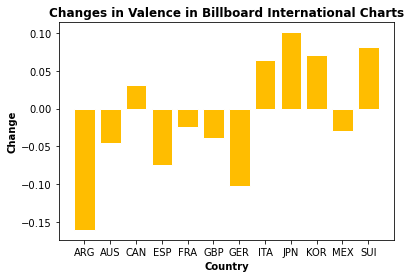

In [17]:
valence_2019 = agg_country_year.loc[(slice(None), 2019), :]['valence'].values
valence_2020 = agg_country_year.loc[(slice(None), 2020), :]['valence'].values
change = valence_2020-valence_2019
createPlotAudioFeature(change, 'Valence', '#FFBD00')

* Most music charts show the trend of declining averaged valence scores of the #1 songs in 2020. 
* In 2020, people who come from these countries listen to more sad songs in 2019.
* Argentines listen to more sadder songs than other countries.
* Canada, Italy, Japan, Korea, Switzerland are the countries which listen to more happy songs in 2020 than in 2019.
* Valence represents musical positiveness, with higher values mean songs are more positive (cheerful, happy, euphoric)

<h3> Danceability

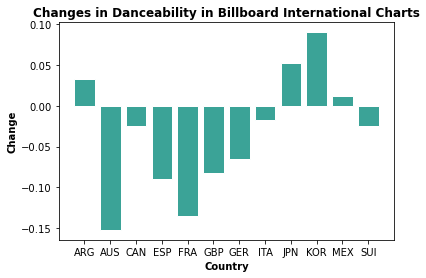

In [18]:
dance_2019 = agg_country_year.loc[(slice(None), 2019), :]['danceability'].values
dance_2020 = agg_country_year.loc[(slice(None), 2020), :]['danceability'].values

change = dance_2020-dance_2019
createPlotAudioFeature(change, 'Danceability', '#3BA397')

* Danceability feature also show declining trend in most of the charts in 2020. 
* Australian chart has the steepest decline in terms of danceability.
* Argentine, Japanese, Korean, and Mexican audiences listen to more danceable songs in 2020 than in 2019. 
* Danceability represents how easy a song is to dance to, with 0 is least danceable and 1 is most danceable.

<h3> Energy

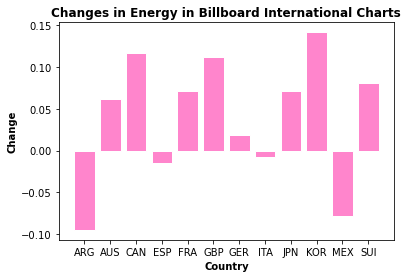

In [19]:
energy_2019 = agg_country_year.loc[(slice(None), 2019), :]['energy'].values
energy_2020 = agg_country_year.loc[(slice(None), 2020), :]['energy'].values

change = energy_2020-energy_2019 
createPlotAudioFeature(change, 'Energy', '#FF85CC')

* While danceability and valence mostly decline in 2020, 8 from 12 charts show inclining scores in Energy feature for the #1 songs. 
* Argentine, Spanish, Italian, and Mexican audiences listen to more less energetic songs than in 2019.
* Argentina's chart has the steepest decline, while Korea's chart has the most significant incline in Energy.
* Energy measures the intensity and activity of the songs, so that energetic tracks will sound fast, loud and noisy.

<h3> Loudness

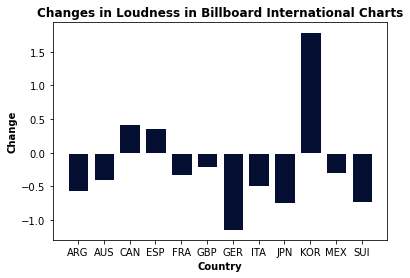

In [20]:
ln_2019 = agg_country_year.loc[(slice(None), 2019), :]['loudness'].values
ln_2020 = agg_country_year.loc[(slice(None), 2020), :]['loudness'].values

change = ln_2020-ln_2019 
createPlotAudioFeature(change, 'Loudness', '#030E30')

Most charts have the loudness of the songs reduced in 2020, while #1 songs in Canada, Spanish and Korean charts are louder in 2020. Korean chart shows most significant increase in loudness.

<h2> Audio Feature Trends Based on Seasons and Regions in 2019 and 2020

In [21]:
agg_cont_season = all_chart.groupby(['Cont', 'season'])[af_cols].agg('mean')

In [22]:
def makeSeasonPlot(var):
    
    # Create Plots of Season and Region Trends
    
    # Subsetting feature values
    asi_v = agg_cont_season.loc['ASI'][var].values
    eur_v = agg_cont_season.loc['EUR'][var].values
    ame_v = agg_cont_season.loc['AME'][var].values
    aus_v = agg_cont_season.loc['AUS'][var].values
    idx1 = agg_cont_season.loc['AME'][var].index

    # Rearranging Data
    dt = { 'ASI' : asi_v, 'AME': ame_v, 'EUR' : eur_v, 'AUS' : aus_v}
    tb = pd.DataFrame(dt, index= idx1)
    tb = tb.reindex(season_idx)

    # Plotting Data
    f, ax = plt.subplots(figsize=(10, 6))
    sn.pointplot(x=tb.index, y='ASI', data = tb,color ='#FF0054', label='Asia')
    sn.pointplot(x=tb.index, y='AME', data = tb,color ='#9E0059', label = 'Europe')
    sn.pointplot(x=tb.index, y='EUR', data = tb,color ='#FF5400', label = 'America')
    sn.pointplot(x=tb.index, y='AUS', data = tb,color ='#390099', label = 'Australia')

    ax.legend(handles=ax.lines[::len(tb)+1], labels=["Asia","Europe","America", 'Australia'])
    plt.title(var.title() + ' Score per Region throughout Seasons',fontweight='bold')
    plt.ylabel(var.title() + ' Index', fontweight='bold')
    plt.xlabel('Season', fontweight='bold')

<h3> Valence

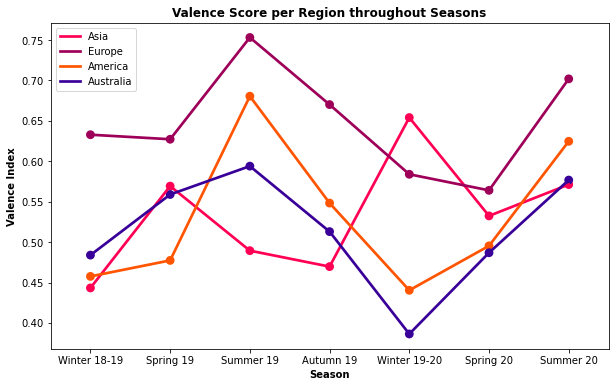

In [23]:
makeSeasonPlot('valence')

America, Australia, and Europe have the similar trend in terms of valence. 
For these three charts, valence score usually peaks in summer, but for Asia, it peaks in both summer and winter, especially in 2019. 
European audiences preferred the songs with higher score of valence.

<h3> Danceability

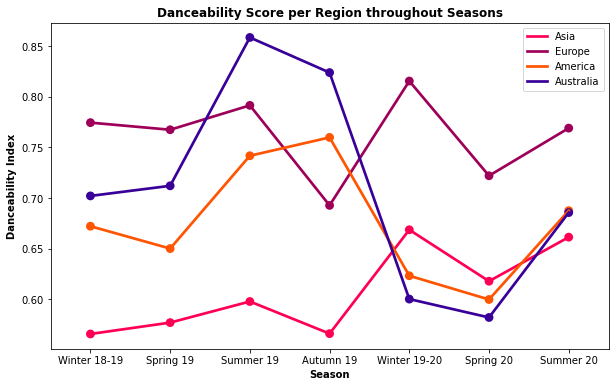

In [24]:
makeSeasonPlot('danceability')

<h4> Both Asia and Europe preferred more danceable songs in summer and winter, seen from the incline in both seasons. For Australia and America, audience listened to more danceable songs in summer & autumn, then lost appetite of this kind of song in winter and spring. Songs in the #1 spot of Asian charts have less score of danceability than the other regions' charts.

<h3> Energy

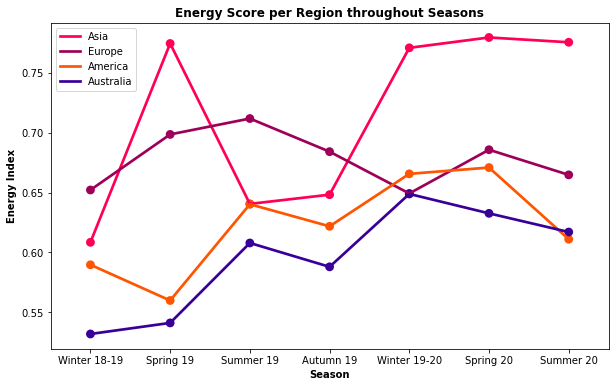

In [25]:
makeSeasonPlot('energy')

<H4> In summer and autumn 2019, audience in Asia changed their preferrence to less energetic songs. They are also the audiences who preferred listening to more energetic songs than other regions. American and Australian audiences generally showed more interest to more energetic songs throughout the time, but those interest were declining toward summer in 2020.

<h3> Loudness

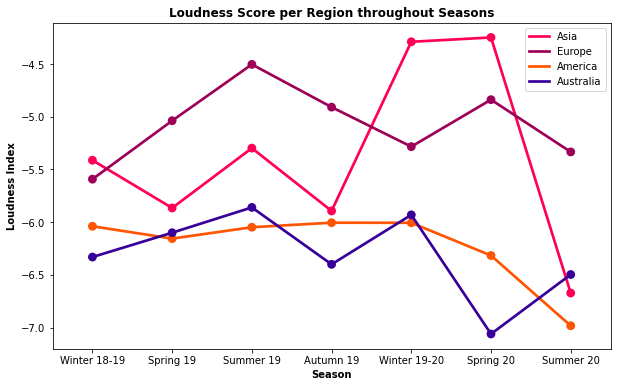

In [26]:
makeSeasonPlot('loudness')

<h4> Asian audiences preferred louder song throughout Winter 2019 and Spring 2020. America chart shows declining trend in terms of loudness. 